In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import re
%matplotlib inline

df_all = pd.read_csv('chefkoch_cleaned.alt.csv')

df = pd.read_csv('zutaten_liste.alt.csv')

df.head()

df_all.head()

def get_variance(row):
    avgs=[]
    for zutat in eval(row['zutaten_clean']):
        avgs.append(float(df[df.name == zutat].avg))
    variance = float(row['Bewertung']) - np.nanmedian(avgs)
    return variance

%%time
df_all['variance'] = df_all.apply(get_variance, axis=1)

df_all.to_csv('chefkoch_cleaned_variance.alt.csv', index = False)

In [2]:
df_all = pd.read_csv('chefkoch_cleaned_variance.alt.csv')

In [3]:
df_all.variance.max()

1.2600000000000002

In [4]:
df_all.variance.min()

-3.0700000000000003

In [5]:
df_all.variance.median()

0.0

In [38]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'patch.facecolor': '#C5C6C8',
    'patch.edgecolor': '#C5C6C8',
    'patch.antialiased': True,
    'font.size': 12.0,
    #'font.family': 'Futura',
    'axes.facecolor': '#C5C6C8',
    'axes.edgecolor': '#C5C6C8',
    'axes.linewidth': '1',
    'axes.grid': False,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'black',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#002458', '#01388B', '#0474BC', '#009DE0', '#004318', '#016B29', '#6AAF21', '#BCCD02', '#013646', '#015764', '#017783', '#0198A1', '#570B56', '#7A0B69', '#E30059', '#700D10', '#940D13', '#EF7F01', '#FDCC03']),
    'xtick.color': 'black',
    'xtick.direction': 'out',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'grid.color': 'C5C6C8',
    'grid.linestyle': '-',
    'figure.facecolor': 'C5C6C8',
    'savefig.bbox' : 'tight',
    'axes.axisbelow': False
})

In [39]:
df_sorted=df_all.sort_values('variance', ascending = False)

In [40]:
def get_color(amnt):
    if amnt > 4:
        return '#FDCC03'
    elif amnt > 3.6:
        return '#EF7F01'
    elif amnt > 3.3:
        return '#940D13'
    else:
        return '#700D10'
bar_colors = [get_color(n) for n in df_sorted.Bewertung]

#'#002458', '#01388B', '#0474BC', '#009DE0', '#004318'



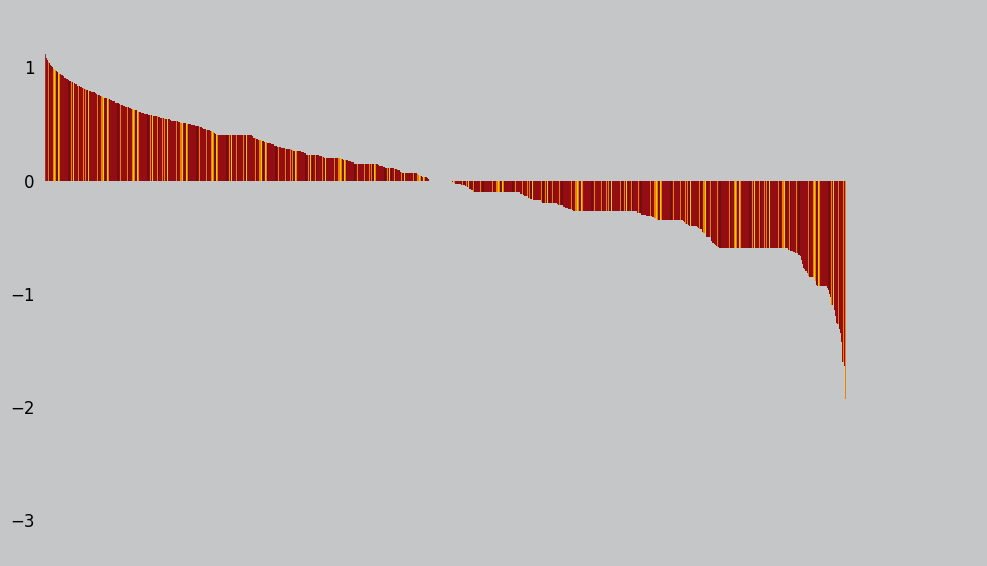

In [76]:
ax=df_sorted.plot(kind = 'bar',x='Gericht', y='variance', color=bar_colors, width=1.0, figsize=(12,7))
ax.xaxis.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(which='both', left=False, bottom=False)
ax.legend().set_visible(False)
plt.savefig('variance.pdf')
plt.show()

In [10]:
df_all.keys()

Index(['Zutaten', 'Bewertung', 'Gericht', 'Bewertungen_Counter', 'URL',
       'zutaten_clean', 'zutaten_anzahl', 'variance'],
      dtype='object')

In [11]:
df_all.Bewertung.describe()

count    58833.000000
mean         3.605736
std          0.501715
min          0.530000
25%          3.330000
50%          3.600000
75%          4.000000
max          4.860000
Name: Bewertung, dtype: float64

In [13]:
df_zut = pd.read_csv('zutaten_liste.alt.csv')

In [14]:
df_zut[df_zut.avg.notna()]

,count,name,avg
10,10,Austern,3.635
13,116,Erdnussöl,3.400
29,41,Gänseschmalz,3.500
30,19,Vanillepuddingpulver,3.675
35,19,Gehacktes vom Rind,3.535
43,15,Smarties,3.415
70,53,Kräuterquark,3.500
74,22,Linguine,3.330
75,16,Crevetten,3.450
92,1327,Semmelbrösel,3.600


In [15]:
df_zut.sort_values(by='avg', ascending = False)

,count,name,avg
7350,10,Ketjap Manis,4.200
13935,10,Chili - Flocken,4.130
9408,11,Milch 3,4.110
3789,11,Butter /Margarine,4.060
4338,14,brauner Zucker,4.050
5540,16,Zucker oder Süßstoff nach Belieben,4.030
5375,16,Süßstoff nach Belieben,4.030
6018,13,Schweinshaxe,4.000
1529,10,Weizenbier,4.000
13432,68,Backmalz,4.000


In [16]:
df_zut['name'][9408] =  'Milch'
df_zut[df_zut['name'] == 'Milch']

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,count,name,avg
2913,10729,Milch,3.60
9408,11,Milch,4.11


In [17]:
df_zut['avg'][2913] = df_zut[df_zut['name'] == 'Milch'].avg.mean()
df_zut['count'][2913] = df_zut[df_zut['name'] == 'Milch']['count'].sum()

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df_zut.drop(df_zut.index[9408], inplace = True)

In [19]:
# Index 5375 "Süßstoff nach Belieben" is a duplicate, same as "Zucker oder Süßstoff nach Belieben" - I'll drop it.
df_zut.drop(df_zut.index[5375], inplace = True)

In [70]:
df_best = df_zut.sort_values(by='avg', ascending = False).head(15).sort_values(by='avg')
df_worst = df_zut.sort_values(by='avg', ascending = True).head(15).sort_values(by='avg')
df_concat = pd.concat([df_best, df_worst])

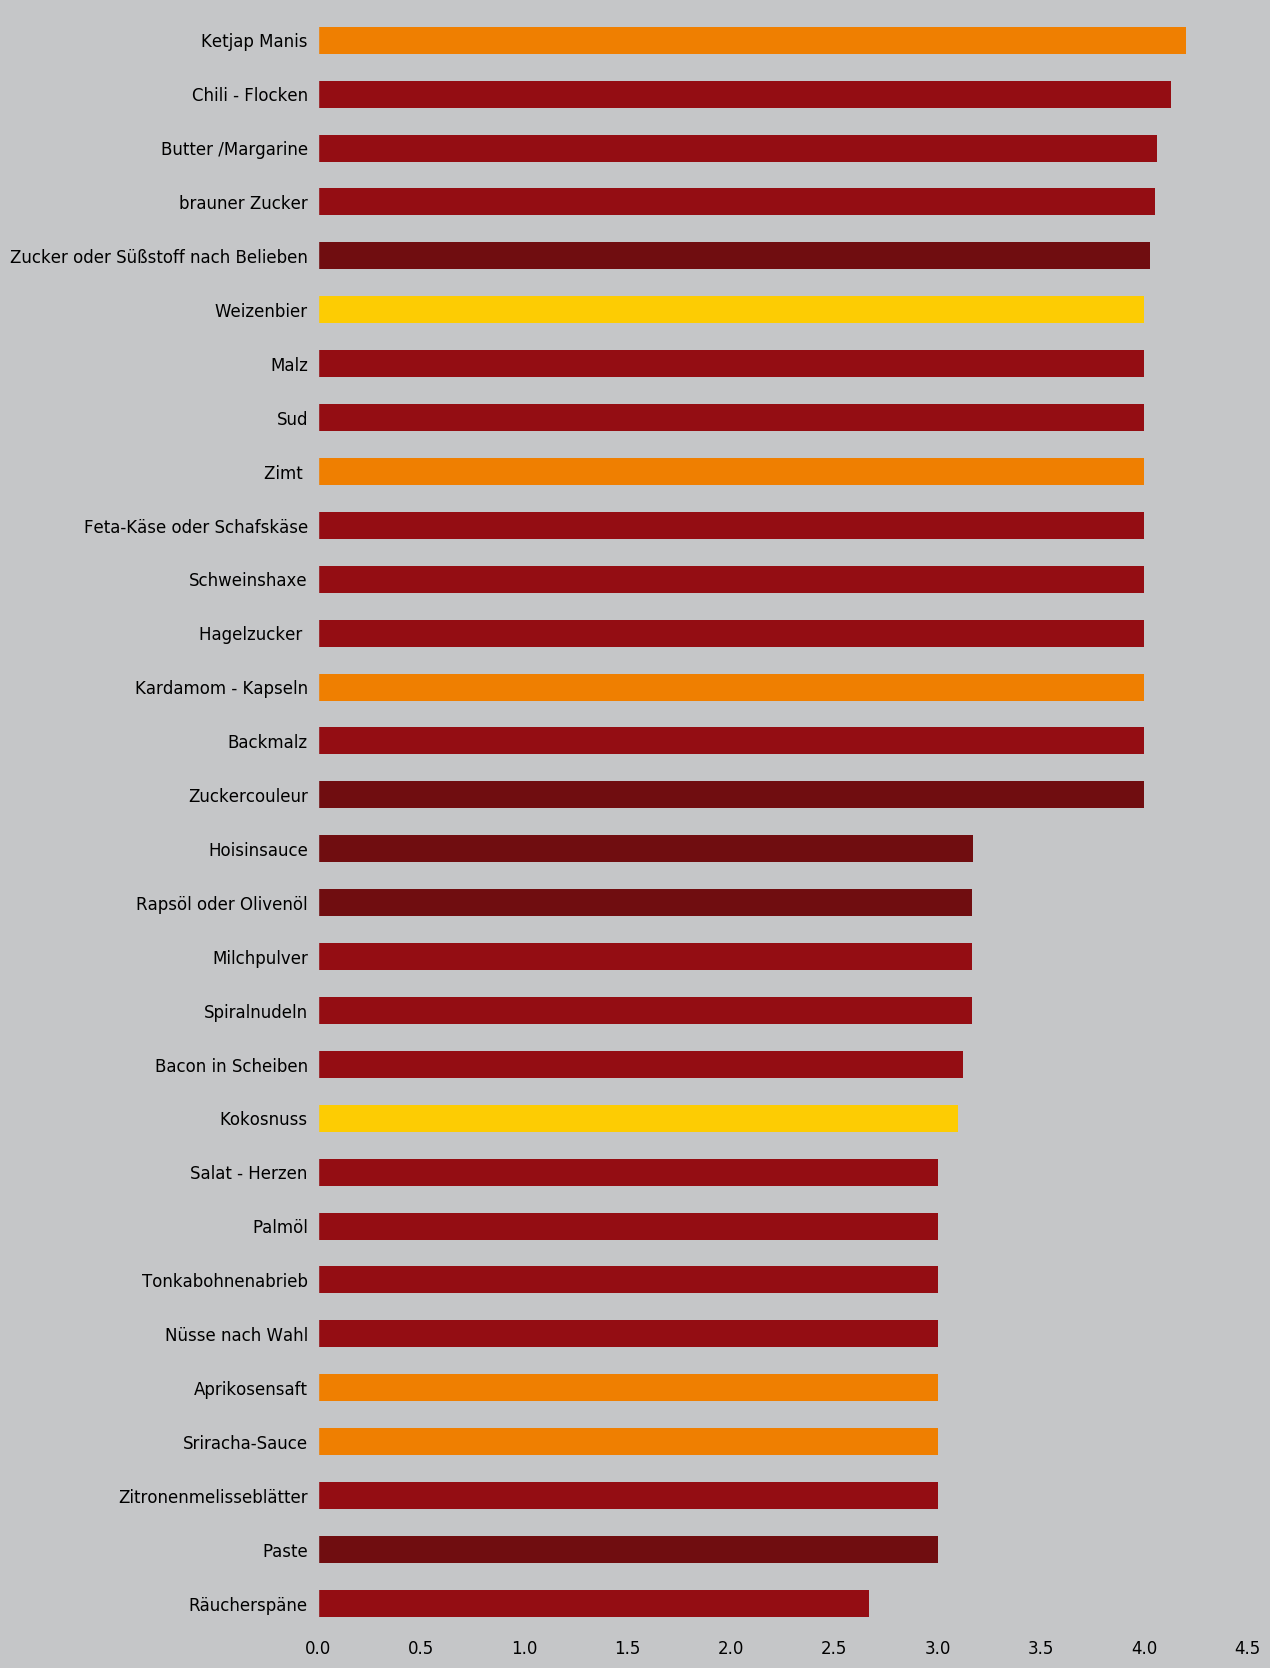

In [71]:
def get_color(amnt):
    if amnt > 30:
        return '#FDCC03'
    elif amnt > 20:
        return '#EF7F01'
    elif amnt > 10:
        return '#940D13'
    else:
        return '#700D10'
bar_colors = [get_color(n) for n in df_concat['count']]

ax = df_concat.sort_values(by='avg').plot(kind='barh', color = bar_colors, y='avg', x='name', legend = False, figsize=(12,21))
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_xlim([0,4.5])
plt.savefig('best_ingr.pdf')
plt.show()

#700D10 - dark
#940D13
#EF7F01
#FDCC03 - light

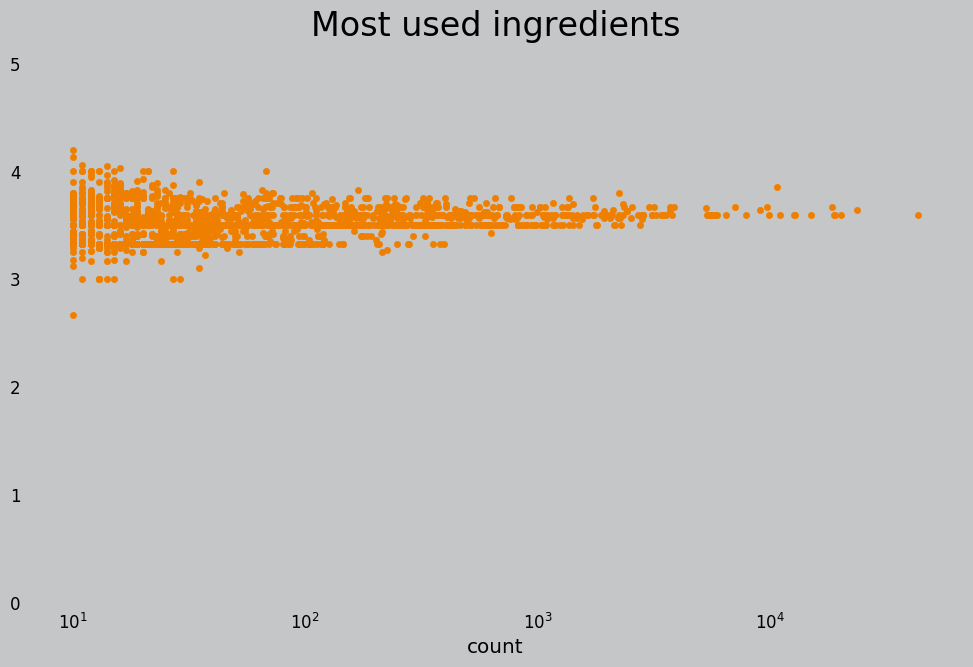

In [75]:
ax = df_zut.sort_values(by='count', ascending = False).sort_values(by='count').plot(kind='scatter', color = "#EF7F01", x='count', y='avg', legend = False, figsize=(12,7))
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_xscale('log')
ax.set_ylim([0,5])
ax.set_title ("Most used ingredients", pad=20,fontsize=24)
plt.savefig('most_used.pdf')
plt.show()

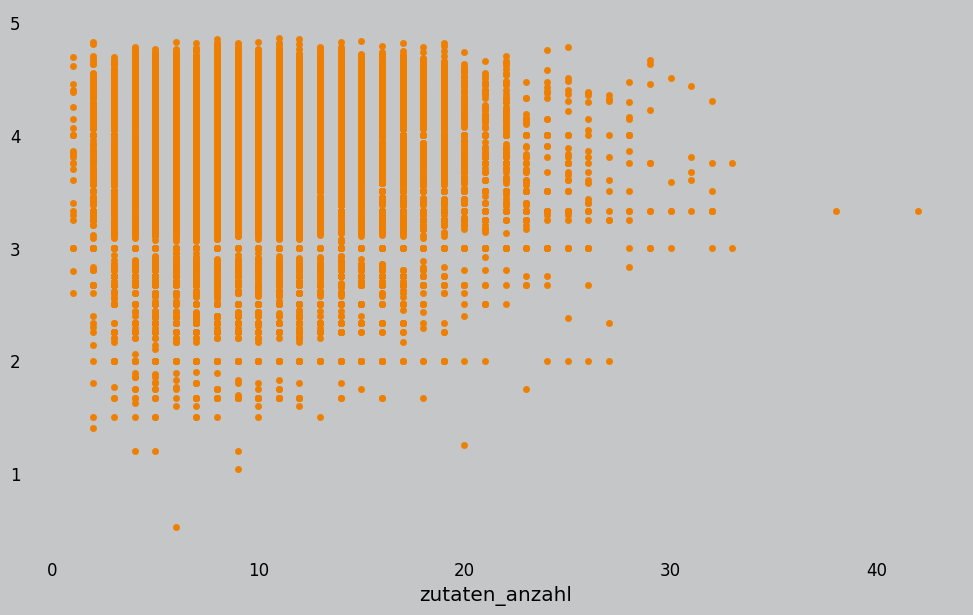

In [73]:
ax = df_all.plot(kind='scatter', color = "#940D13", x='zutaten_anzahl', y='Bewertung', legend = False, figsize=(12,7))
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
plt.savefig('avg_anzahl.pdf')
plt.show()

In [36]:
df_zut.keys()

Index(['count', 'name', 'avg'], dtype='object')

In [56]:
df_all.keys()

Index(['Zutaten', 'Bewertung', 'Gericht', 'Bewertungen_Counter', 'URL',
       'zutaten_clean', 'zutaten_anzahl', 'variance'],
      dtype='object')